In [7]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

In [8]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [9]:
df

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,...,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6090,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,13.0,6.0,6.0,0,Terciario,Completado,...,En mi trabajo actual,Heterosexual,NaN,No,501-1000,Otras industrias,7,8,Viáticos,NaN
6091,Hombre,38,Argentina,Ciudad Autónoma de Buenos Aires,12.0,5.0,5.0,0,Universitario,En curso,...,Jamás,Heterosexual,NaN,NaN,2001-5000,Otras industrias,8,10,"Abono de celular, Capacitaciones y/o cursos, D...",NaN
6092,Hombre,24,Argentina,Ciudad Autónoma de Buenos Aires,2.0,2.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,NaN,201-500,Producto basado en Software,7,9,"Capacitaciones y/o cursos, Clases de idiomas, ...",Mercado Libre
6093,Hombre,28,Argentina,La Pampa,5.0,3.0,2.0,0,Terciario,En curso,...,Jamás,Heterosexual,NaN,No,51-100,Servicios / Consultoría de Software / Digital,5,7,Capacitaciones y/o cursos,Solo Nubity


# **Ejercicio 1:** 

Responder: **¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?**


In [10]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [11]:
salary_col = 'salary_monthly_NETO'
experience_col = 'profile_years_experience'
avg_salary = df[salary_col].mean()
print("Salario promedio: ",avg_salary)
avg_salary_norm = clean_outliers(df, salary_col)[salary_col].mean()
print("Salario promedio con limites recortados:",avg_salary_norm)

print("Programadores que ganan mas de la media:\n")
print("Todos los casos:",len(df[df[salary_col] > avg_salary]))
print("Sin outliers:",len(df[df[salary_col] > avg_salary_norm]))

exp_5 = df[df[experience_col] >= 5]
print("programadores con mas de 5 años que ganan mas que la media:",len(exp_5[exp_5[salary_col] > avg_salary]))
print("programadores con mas de 5 años que ganan mas que la media sin outliers:",len(exp_5[exp_5[salary_col] > avg_salary_norm]))

print("Probabilidad: ", len(exp_5[exp_5[salary_col] > avg_salary]) / len(df))
print("Probabilidad sin outliers: ", len(exp_5[exp_5[salary_col] > avg_salary_norm]) / len(df))


Salario promedio:  94907.9491018188
Salario promedio con limites recortados: 83627.61845775996
Programadores que ganan mas de la media:

Todos los casos: 2019
Sin outliers: 2582
programadores con mas de 5 años que ganan mas que la media: 1764
programadores con mas de 5 años que ganan mas que la media sin outliers: 2213
Probabilidad:  0.28941755537325675
Probabilidad sin outliers:  0.363084495488105


*<span style="color:#ABDDF0">No me quedo muy claro como esta hecha la funcion clean_outliers, que sueldos esta dejando afuera?</span>*

**La probabilidad de ganar mas teniendo 5 años de experiencia parece baja tanto para el calculo con outliers como sin. Se incrementa en un 8% aproximadamente pero no es lo que uno esperaria de los sueldos de los programadores pasados 5 años.**

In [12]:
print(df.columns)

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

### Respuestas teoricas:
    
- ¿Por qué podemos usar la teoría de la probabilidad?

*Porque nuestros eventos son independientes y se distribuyen de una manera normal.*

- ¿Por qué calculamos una probabilidad con esta fórmula?

*Porque la probabilidad del evento tambien es su proporcion.*

- ¿Cómo podemos interpretar esta probabilidad?

*La experiencia no necesariamente indica que el sueldo a recibir sera mayor a la media.*

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario Neto) en conjunto, que comentarios puede hacer al respecto?

*<span style="color:#ABDDF0">Son variables que deberian tener correlacion entre si, ya que el NETO deberia ser un proporcional del BRUTO. A pesar de esto, existen muchas entradas del dataFrame que no tienen valores coherentes de estos campos. Lo ideal para el analisis seria determinar cuales son los casos que no tendria sentido incluir, y descartarlos.</span>*

2. Genere una nueva variable `'salary_monthly_DESCUENTOS'= 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales. 

In [13]:
bruto_col = 'salary_monthly_BRUTO'
neto_col = 'salary_monthly_NETO'
salary_monthly_DESCUENTOS = df[bruto_col] - df[neto_col]
salary_monthly_DESCUENTOS

0       10000.000
1       16000.000
2       33000.000
3       28000.000
4       34000.000
          ...    
6090     2000.000
6091    14000.000
6092    47204.247
6093    85928.000
6094    20000.000
Length: 6095, dtype: float64

1. ¿Qué concepto matemático utiliza para entender la nueva variable?

*<span style="color:#ABDDF0">Es una variable aleatoria ya que es el resultado de la resta entre dos variables aleatorias.

Media, correlacion entre variables para analizar como se comportan entre si
</span>*
    

2. Calcule de dos fomas diferentes la media muestral de dicha variable. 

In [14]:
df.drop(df[df[salary_col].isnull()].index, inplace = True) # saca valores nulos de la columna neto

# Resta de las medias
print("Resta de las medias:",df[bruto_col].mean() - df[neto_col].mean())
# Media de la resta
print("Media de la resta:",(df[bruto_col] - df[neto_col]).mean())
# no entiendo porque me dan distintas

Resta de las medias: 27073.66727621961
Media de la resta: 27073.667276219614


3. Analice la distribución de los datos, su rango de valores e interprete. ¿Qué puede estar pasando? ¿Qué propone como solución?

<AxesSubplot:xlabel='salary_monthly_BRUTO'>

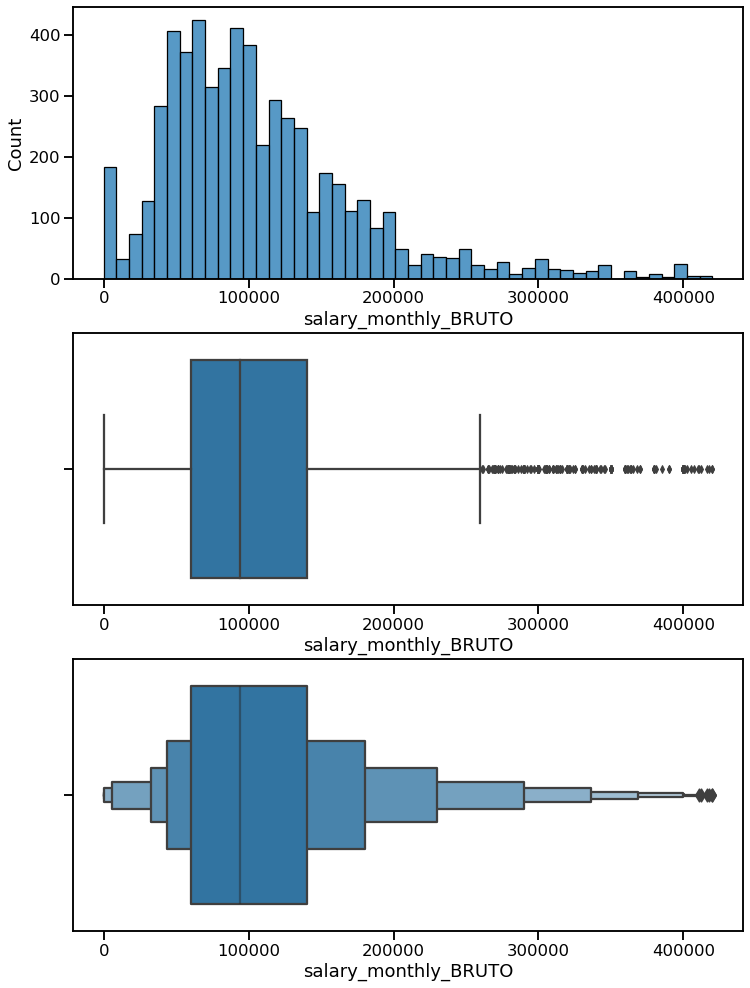

In [15]:
# Analisis de salario bruto
fig, axes = plt.subplots(figsize=(12, 17), nrows=3)
#max_limit = df[salary_col].quantile(.98)
data = clean_outliers(df, bruto_col)[bruto_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

Conclusiones de ver el histograma:
    - Asimetrico hacia la derecha
    - 

<AxesSubplot:xlabel='salary_monthly_NETO'>

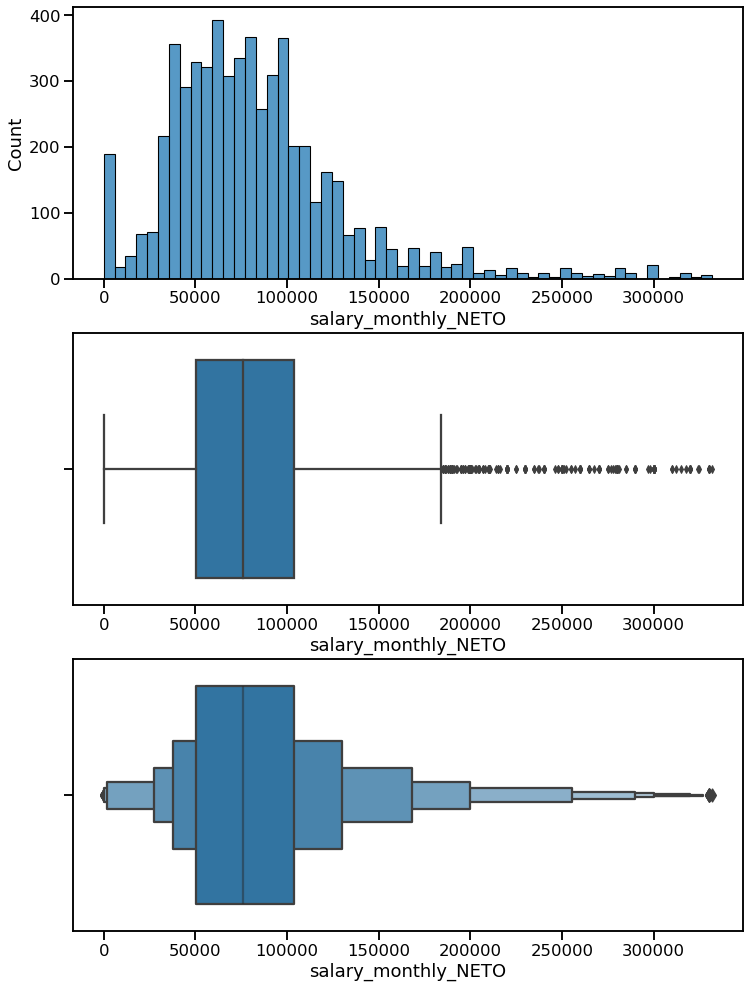

In [16]:
# Analisis de salario neto
fig, axes = plt.subplots(figsize=(12, 17), nrows=3)
#max_limit = df[salary_col].quantile(.98)
data = clean_outliers(df, neto_col)[neto_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

<AxesSubplot:>

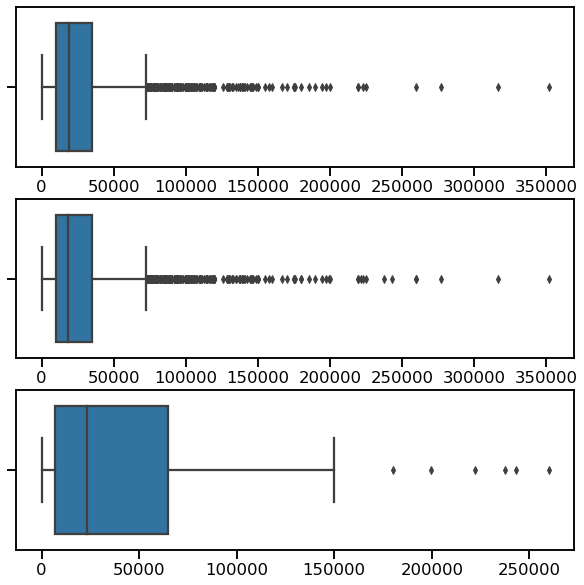

In [27]:
# Analisis de la resta, donde la resta es mayor a 0

resta = clean_outliers(df, bruto_col)[bruto_col] - clean_outliers(df, neto_col)[neto_col]


#divi = clean_outliers(df, bruto_col)[bruto_col] / clean_outliers(df, neto_col)[neto_col]

fig, axes = plt.subplots(figsize=(10, 10), nrows=3)
max_limit = df[salary_col].quantile(.98)
data_mayor = resta[resta > 0] # Solo casos donde la resta es > 0
data_abs = abs(resta) # alt. 2: valor absoluto
data_menor = abs(resta[resta < 0]) # solo casos donde el neto es mayor al bruto. 

#seaborn.histplot(x=data, ax=axes[0])
#seaborn.boxplot(x=data, ax=axes[1])
#seaborn.boxenplot(x=data, ax=axes[2])

seaborn.boxplot(x=data_mayor, ax=axes[0])
seaborn.boxplot(x=data_abs, ax=axes[1])
seaborn.boxplot(x=data_menor, ax=axes[2])


Hay 150 casos donde la resta da <0. Los casos son raros y para facilitar el analisis se toma la decision de descartarlos. 

Trabajamos con el salario neto, y descartamos los casos donde el neto sea 0. 

In [19]:
casos excepcionales

SyntaxError: invalid syntax (<ipython-input-19-32606045c4f0>, line 1)

Que opciones hay con los casos de la resta que dan negativo?
    - Se sacan
    - Se recalculan
    


In [ ]:
df

3. Considerando toda la base:
    1. ¿Que pregunta le interesaría responder?
    
    *<span style="color:#ABDDF0">Hay mayor probabilidad de tener un sueldo mayor si se esta recibido con un titulo de grado vs si se esta estudiando una carrera universitaria?</span>*
    
    2. ¿Que par de variables le conviene analizar en conjunto? Visualice su distribución conjunta. 
    *<span style="color:#ABDDF0">profile_studies_level, profile_studies_level_state, salary_monthly_NETO</span>*
    
    3. ¿Qué medidas podrían resumir la información de la distribución de esas variables? visualícelas e interprete cada una.
    *<span style="color:#ABDDF0">El nivel de estudios y el estado de estudios son variables categoricas. En algunos casos las variables indican situaciones ambiguas, como estudios "incompletos" o "en curso", cuyas diferencias existen pero hay que ver si queremos o no tenerlas en cuenta. </span>*

In [ ]:
# Analisis de salario neto
fig, axes = plt.subplots(figsize=(12, 17), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = clean_outliers(df, neto_col)[neto_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

In [28]:
## Tabla de contingencia
pd.crosstab(df.profile_studies_level, df.profile_studies_level_state)#, normalize=True)
# ORDENAR: Incompleto, En curso, Completado 

profile_studies_level_state,Completado,En curso,Incompleto
profile_studies_level,,,
Doctorado,11,14,4
Posdoctorado,3,1,0
Posgrado,208,79,30
Primario,2,0,0
Secundario,373,11,50
Terciario,644,227,235
Universitario,1568,1303,1120


/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Universitario'),
  Text(1, 0, 'Secundario'),
  Text(2, 0, 'Posgrado'),
  Text(3, 0, 'Terciario'),
  Text(4, 0, 'Doctorado'),
  Text(5, 0, 'Posdoctorado'),
  Text(6, 0, 'Primario')])

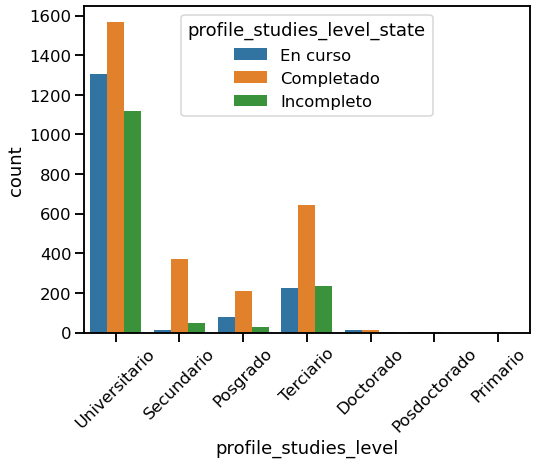

In [29]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(df.profile_studies_level,  hue=df.profile_studies_level_state )
plt.xticks(rotation=45)

Ya que lo que me interesa es cruzar solo una variable categorica con la numerica que es el sueldo, voy a hacer 2 analisis con los casos de estudios universitarios y terciarios, que es donde mas tengo datos sobre gente que termino o no sus estudios

In [31]:
df_uni = df[df['profile_studies_level'] == 'Universitario']
df_ter = df[df['profile_studies_level'] == 'Terciario']

Con esto ya podemos comparar cada uno de los subgrupos con el salario neto y si tienen o no los estudios terminados o incompletos

## Estudios Universitarios

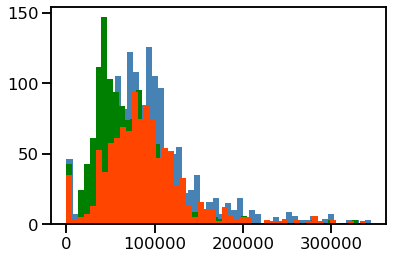

In [32]:
# ESTUDIOS UNIVERSITARIOS

filtered_df = clean_outliers(df_uni, salary_col)

df_inc= filtered_df[ filtered_df['profile_studies_level_state']=='Incompleto']
df_comp=filtered_df[ filtered_df['profile_studies_level_state']=='Completado']
df_enc=filtered_df[ filtered_df['profile_studies_level_state']=='En curso']

plt.hist(df_comp[salary_col], color='steelblue', bins=50) # azul: estudios completos
plt.hist(df_enc[salary_col], color='green', bins=50) # verde: estudios en curso
plt.hist(df_inc[salary_col], color='orangered', bins=50) # rojo: estudios incompletos
plt.show()

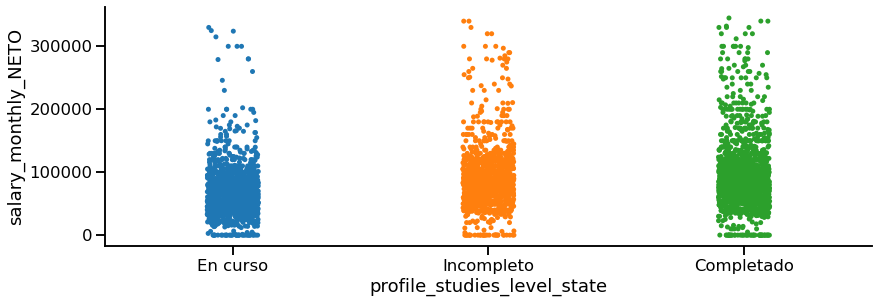

In [34]:
seaborn.catplot(data=clean_outliers(df_uni, salary_col), y='salary_monthly_NETO',
                x='profile_studies_level_state', height=4, aspect=3)

Se espera que los que tienen estudios universitarios completos tengan mayor probabilidad de tener un sueldo mayor. El grafico muestra que hay una distribucion parecida para los tres casos. Ademas, hay una mayor densidad de casos con estudios incompletos en sueldos mayores que en los casos para estudios en curso.

## Estudios Terciarios

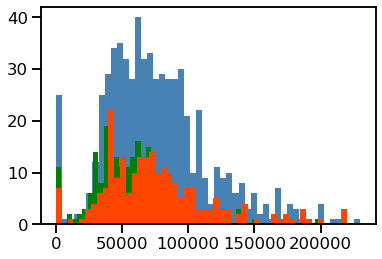

In [35]:
# ESTUDIOS TERCIARIOS

filtered_df = clean_outliers(df_ter, salary_col)

df_inc= filtered_df[ filtered_df['profile_studies_level_state']=='Incompleto']
df_comp=filtered_df[ filtered_df['profile_studies_level_state']=='Completado']
df_enc=filtered_df[ filtered_df['profile_studies_level_state']=='En curso']

plt.hist(df_comp[salary_col], color='steelblue', bins=50) # Azul: Estudios completos
plt.hist(df_enc[salary_col], color='green', bins=50) # Verde: Estudios en curso
plt.hist(df_inc[salary_col], color='orangered', bins=50) # Rojo: Estudios incompletos
plt.show()

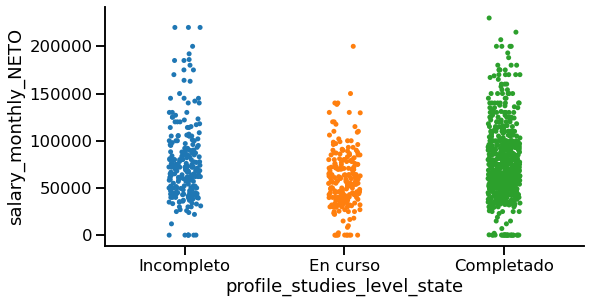

In [36]:
seaborn.catplot(data=clean_outliers(df_ter, salary_col), y='salary_monthly_NETO',
                x='profile_studies_level_state', height=4, aspect=2)

Al igual que con los estudios universitarios, se espera que los que tengan los estudios completos tengan una mayor densidad en los sueldos altos. Similarmente, se da que las distribuciones son parecidas. Existe un mayor contraste en cantidad de gente que termino los estudios terciarios comparando con quien no los termino o esta en curso.

4. Resuma:
    1. Si está queriendo analizar el comportamiento conjunto de dos variables, ¿qué gráficos y medidas conviene utilizar? 
    *<span style="color:#ABDDF0"> Media, mediana, varianza, moda. Histograma.  </span>*
    2. ¿Y si ambas variables son numéricas?
    *<span style="color:#ABDDF0"> pairplot, jointplot, scatterplot </span>*
    3. ¿Y si ambas son categóricas? 
    *<span style="color:#ABDDF0"> Moda, heatmap, countplot </span>*
    4. ¿Y si una es categórica y la otra numérica?
    *<span style="color:#ABDDF0"> pairplot, catplot, boxenplot </span>*